# EDA Analysis of Raw NBA DATA

In [1]:
import os
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#%config InlineBackend.figure_format = 'svg'

os.chdir('..') #change to parent directory

from pathlib import Path  #for Windows/Linux compatibility
DATAPATH = Path(r'data')


In [2]:

#games = pd.read_csv(DATAPATH / "engineered" / "engineered_features.csv")
games = pd.read_csv("win_streaks_home.csv")
games.head()

,Unnamed: 0,game_id,season,game_date,sub_season_id,is_playoff,is_overtime,min,team_id,is_home_team,team,match_up,pts,fgm,fga,fg_pct,3pm,3pa,3p_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,plus_minus,off_rtg,def_rtg,net_rtg,ast_pct,ast_turnover_ratio,ast_ratio,oreb_pct,dreb_pct,reb_pct,tov_pct,efg_pct,ts_pct,pace,pie,fta_rate,opp_efg_pct,opp_fta_rate,opp_tov_pct,opp_oreb_pct,pts_off_to,2nd_pts,fbps,pitp,opp_pts_off_to,opp_2nd_pts,opp_fbps,opp_pitp,pct_fga_2pt,pct_fga_3pt,pct_pts_2pt,pct_pts_2pt_mr,pct_pts_3pt,pct_pts_fbps,pct_pts_ft,pct_pts_off_to,pct_pts_pitp,2fgm_pct_ast,2fgm_pct_uast,3fgm_pct_ast,3fgm_pct_uast,fgm_pct_ast,fgm_pct_uast,is_win,win_streak_home
0,1,600001,2006,2006-10-31,2,0,0,240,1610612748,1,MIA,MIA vs. CHI,66,25,65,38.5,3,17,17.6,13,22,59.1,4,25,29,13,6,3,23,24,-42,71.0,117.4,-46.4,52.0,0.57,11.7,13.6,61.4,37.5,24.7,40.8,44.2,92.5,15.0,0.338,53.8,0.405,17.4,38.6,15,2,6,26,32,18,21,36,73.8,26.2,66.7,27.3,13.6,9.1,19.7,22.7,39.4,54.5,45.5,33.3,66.7,52.0,48.0,0,0
1,3,600002,2006,2006-10-31,2,0,0,240,1610612747,1,LAL,LAL vs. PHX,114,46,83,55.4,6,12,50.0,16,24,66.7,12,31,43,30,11,1,21,19,8,109.6,102.9,6.7,65.2,1.43,20.5,31.7,89.5,59.5,20.2,59.0,60.9,103.5,56.0,0.289,60.4,0.221,20.4,10.5,31,9,25,66,16,8,20,34,85.5,14.5,70.2,12.3,15.8,21.9,14.0,27.2,57.9,62.5,37.5,83.3,16.7,65.2,34.8,1,0
2,5,600003,2006,2006-11-01,2,0,0,240,1610612755,1,PHI,PHI vs. ATL,88,31,74,41.9,3,9,33.3,23,25,92.0,15,32,47,19,10,6,17,22,13,101.1,85.2,15.9,61.3,1.12,15.4,39.5,62.3,52.1,19.5,43.9,51.8,87.5,69.3,0.338,35.9,0.282,20.5,37.7,16,14,13,36,13,16,11,34,87.8,12.2,63.6,22.7,10.2,14.8,26.1,18.2,40.9,60.7,39.3,66.7,33.3,61.3,38.7,1,0
3,7,600004,2006,2006-11-01,2,0,0,240,1610612766,1,CHA,CHA vs. IND,99,37,78,47.4,4,10,40.0,21,32,65.6,11,35,46,23,8,7,22,29,-7,94.3,101.0,-6.7,62.2,1.05,16.5,23.4,67.9,47.6,21.0,50.0,53.8,105.0,45.7,0.410,44.2,0.477,16.2,32.1,24,13,21,52,35,15,23,48,87.2,12.8,66.7,14.1,12.1,21.2,21.2,24.2,52.5,57.6,42.4,100.0,0.0,62.2,37.8,0,0
4,9,600005,2006,2006-11-01,2,0,0,240,1610612753,1,ORL,ORL vs. CHI,109,35,59,59.3,6,8,75.0,33,42,78.6,6,30,36,21,7,7,23,23,15,114.7,98.9,15.8,60.0,0.91,16.9,29.6,68.8,54.7,24.2,64.4,70.3,95.0,69.0,0.712,48.8,0.293,15.8,31.3,22,10,17,44,28,11,9,38,86.4,13.6,53.2,12.8,16.5,15.6,30.3,20.2,40.4,55.2,44.8,83.3,16.7,60.0,40.0,1,0


for description of the different stats, see https://www.nba.com/stats/help/glossary

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21503 entries, 0 to 21502
Data columns (total 75 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          21503 non-null  int64  
 1   game_id             21503 non-null  int64  
 2   season              21503 non-null  int64  
 3   game_date           21503 non-null  object 
 4   sub_season_id       21503 non-null  int64  
 5   is_playoff          21503 non-null  int64  
 6   is_overtime         21503 non-null  int64  
 7   min                 21503 non-null  int64  
 8   team_id             21503 non-null  int64  
 9   is_home_team        21503 non-null  int64  
 10  team                21503 non-null  object 
 11  match_up            21503 non-null  object 
 12  pts                 21503 non-null  int64  
 13  fgm                 21503 non-null  int64  
 14  fga                 21503 non-null  int64  
 15  fg_pct              21503 non-null  float64
 16  3pm 

###
### Check for duplicates and nulls

In [4]:
# duplicates
games.duplicated().sum()

0

In [5]:
#null values
games.isnull().sum()

Unnamed: 0         0
game_id            0
season             0
game_date          0
sub_season_id      0
                  ..
3fgm_pct_uast      0
fgm_pct_ast        0
fgm_pct_uast       0
is_win             0
win_streak_home    0
Length: 75, dtype: int64

In [6]:
#show the nulls
games[games.isna().any(axis=1)]

,Unnamed: 0,game_id,season,game_date,sub_season_id,is_playoff,is_overtime,min,team_id,is_home_team,team,match_up,pts,fgm,fga,fg_pct,3pm,3pa,3p_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,plus_minus,off_rtg,def_rtg,net_rtg,ast_pct,ast_turnover_ratio,ast_ratio,oreb_pct,dreb_pct,reb_pct,tov_pct,efg_pct,ts_pct,pace,pie,fta_rate,opp_efg_pct,opp_fta_rate,opp_tov_pct,opp_oreb_pct,pts_off_to,2nd_pts,fbps,pitp,opp_pts_off_to,opp_2nd_pts,opp_fbps,opp_pitp,pct_fga_2pt,pct_fga_3pt,pct_pts_2pt,pct_pts_2pt_mr,pct_pts_3pt,pct_pts_fbps,pct_pts_ft,pct_pts_off_to,pct_pts_pitp,2fgm_pct_ast,2fgm_pct_uast,3fgm_pct_ast,3fgm_pct_uast,fgm_pct_ast,fgm_pct_uast,is_win,win_streak_home


In [13]:
df = games[games['team_id']==1610612741]
df = df[df['season']==2019]

In [14]:
# exclude games "rolling" in field name
df.drop(columns=df.filter(like='rolling').columns)

df.head(25)




,Unnamed: 0,game_id,season,game_date,sub_season_id,is_playoff,is_overtime,min,team_id,is_home_team,team,match_up,pts,fgm,fga,fg_pct,3pm,3pa,3p_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,plus_minus,off_rtg,def_rtg,net_rtg,ast_pct,ast_turnover_ratio,ast_ratio,oreb_pct,dreb_pct,reb_pct,tov_pct,efg_pct,ts_pct,pace,pie,fta_rate,opp_efg_pct,opp_fta_rate,opp_tov_pct,opp_oreb_pct,pts_off_to,2nd_pts,fbps,pitp,opp_pts_off_to,opp_2nd_pts,opp_fbps,opp_pitp,pct_fga_2pt,pct_fga_3pt,pct_pts_2pt,pct_pts_2pt_mr,pct_pts_3pt,pct_pts_fbps,pct_pts_ft,pct_pts_off_to,pct_pts_pitp,2fgm_pct_ast,2fgm_pct_uast,3fgm_pct_ast,3fgm_pct_uast,fgm_pct_ast,fgm_pct_uast,is_win,win_streak_home
15779,33721,1900031,2019,2019-10-26,2,0,0,240,1610612741,1,CHI,CHI vs. TOR,84,29,97,29.9,9,35,25.7,17,25,68.0,12,33,45,18,9,2,15,22,-24,79.2,101.9,-22.6,62.1,1.20,12.8,23.9,77.3,44.3,14.2,34.5,38.9,106.0,25.7,0.258,55.5,0.220,22.6,22.7,20,15,7,38,18,6,25,38,63.9,36.1,47.6,2.4,32.1,8.3,20.2,23.8,45.2,45.0,55.0,100.0,0.0,62.1,37.9,0,-5
15821,33805,1900073,2019,2019-11-01,2,0,0,240,1610612741,1,CHI,CHI vs. DET,112,39,89,43.8,16,40,40.0,18,23,78.3,11,31,42,29,6,1,17,18,6,112.0,105.0,7.0,74.4,1.71,20.1,29.6,71.7,49.0,17.0,52.8,56.5,100.5,49.2,0.258,51.8,0.282,15.8,28.3,19,14,8,40,19,11,13,66,55.1,44.9,41.1,5.4,42.9,7.1,16.1,17.0,35.7,69.6,30.4,81.3,18.8,74.4,25.6,1,-6
15848,33859,1900100,2019,2019-11-05,2,0,0,240,1610612741,1,CHI,CHI vs. LAL,112,43,85,50.6,14,32,43.8,12,23,52.2,7,35,42,22,11,4,16,21,-6,107.7,112.4,-4.7,51.2,1.38,16.4,17.0,73.1,46.5,15.4,58.8,58.9,104.5,45.6,0.271,54.9,0.261,15.2,26.9,23,13,26,48,20,14,14,52,62.4,37.6,51.8,8.9,37.5,23.2,10.7,20.5,42.9,37.9,62.1,78.6,21.4,51.2,48.8,0,1
15877,33917,1900129,2019,2019-11-09,2,0,0,240,1610612741,1,CHI,CHI vs. HOU,94,37,98,37.8,4,32,12.5,16,18,88.9,11,35,46,21,14,5,15,22,-23,86.2,108.3,-22.1,56.8,1.40,14.7,22.6,77.6,46.8,13.8,39.8,44.4,108.5,40.9,0.184,58.4,0.337,22.2,22.4,23,10,25,64,20,12,28,34,67.3,32.7,70.2,2.1,12.8,26.6,17.0,24.5,68.1,54.5,45.5,75.0,25.0,56.8,43.2,0,-1
15897,33957,1900149,2019,2019-11-12,2,0,0,240,1610612741,1,CHI,CHI vs. NYK,120,41,81,50.6,14,33,42.4,24,31,77.4,9,37,46,22,9,2,20,25,18,116.5,99.0,17.5,53.7,1.10,15.9,30.2,70.7,53.5,19.4,59.3,63.4,103.0,61.3,0.383,46.6,0.352,17.5,29.3,24,17,10,52,26,13,20,46,59.3,40.7,45.0,1.7,35.0,8.3,20.0,20.0,43.3,44.4,55.6,71.4,28.6,53.7,46.3,1,-2
15923,34009,1900175,2019,2019-11-16,2,0,0,240,1610612741,1,CHI,CHI vs. BKN,111,32,91,35.2,9,39,23.1,38,41,92.7,17,39,56,15,8,2,20,30,-6,100.9,107.3,-6.4,46.9,0.75,10.2,37.7,82.4,58.0,18.2,40.1,50.9,109.5,40.9,0.451,51.1,0.352,13.8,17.6,24,23,11,36,18,7,16,56,57.1,42.9,41.4,9.0,24.3,9.9,34.2,21.6,32.4,34.8,65.2,77.8,22.2,46.9,53.1,0,1
15940,34043,1900192,2019,2019-11-18,2,0,0,240,1610612741,1,CHI,CHI vs. MIL,101,39,97,40.2,12,34,35.3,11,14,78.6,13,37,50,25,6,6,15,25,-14,97.1,110.6,-13.5,64.1,1.67,17.4,25.9,79.2,50.0,14.4,46.4,49.0,104.0,40.6,0.144,55.5,0.427,14.4,20.8,20,16,11,50,17,10,16,46,64.9,35.1,53.5,4.0,35.6,10.9,10.9,19.8,49.5,55.6,44.4,83.3,16.7,64.1,35.9,0,-1
15957,34077,1900209,2019,2019-11-20,2,0,0,240,1610612741,1,CHI,CHI vs. DET,109,39,91,42.9,14,27,51.9,17,26,65.4,12,43,55,25,9,7,15,24,20,109.0,89.0,20.0,64.1,1.67,17.6,32.7,76.3,55.3,15.0,50.5,53.2,100.0,60.3,0.286,38.6,0.386,17.0,23.7,24,23,18,48,18,10,9,36,70.3,29.7,45.9,1.8,38.5,16.5,15.6,22.0,44.0,48.0,52.0,92.9,7.1,64.1,35.9,1,-2
15967,34097,1900219,2019,2019-11-22,2,0,0,240,1610612741,1,CHI,CHI vs. MIA,108,41,90,45.6,10,30,33.3,16,20,80.0,14,27,41,23,11,3,13,24,-8,109.1,117.2,-8.1,56.1,1.77,17.0,27.5,66.7,45.2,13.1,51.1,54.7,99.0,42.2,0.222,58.2,0.354,19.2,33.3,26,15,10,58,22,15,6,44,66.7,33.3,57.4,3.7,27.8,9.3,14.8,24.1,53.7,48.4,51.6,80.0,20.0,56.1,43.9,0,1
15995,34153,1900247,2019,2019-11-25,2,0,0,240,1610612741,1,CHI,CHI vs. POR,94,36,86,41.9,9,39,23.1,13,20,65.0,8,29,37,24,8,4,17,20,-23,94.0,115.8,-21.8,66.7,1.41,17.9,18.9,66.7,40.8,17.0,47.1,49.6,100.5,36.6,0.233,56.2,0.247,14.9,33.3,13,8,8,48,24,16,11,50,54.7,45.3,57.4,6.4,28.7,8.5,1

C:\Users\Chris\AppData\Local\Temp\ipykernel_26284\2781929243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['win_streak_home_diff'] = df['win_streak_home'].diff()


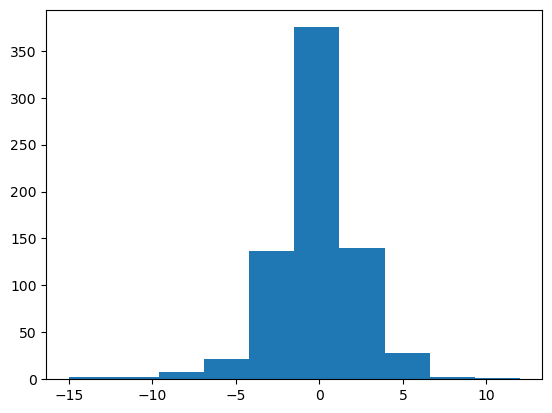

In [9]:
#histogram for win_streak_home difference between subsequent records
df['win_streak_home_diff'] = df['win_streak_home'].diff()
plt.hist(df['win_streak_home_diff'], bins=10)
plt.show()


